In [28]:
#import Libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
#read entire and predicted actives
df_final = pd.read_csv('final.csv')
df_pred = pd.read_csv('predicted_actives_total.csv')
df_check = pd.read_csv('predicted_actives_total.csv') #use this for analysis with all columns
#display actives dataset
df_pred

,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D770,D771,D772,D773,D774,D775,D776,D777,Predictions,Probabilities
0,D488-0121,3,0,0,1,4,0,0,0,0,...,0,0,0,0,5.72792,-0.822058,0.461538,3.663710,1,0.594959
1,D488-0114,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.70044,-0.816815,0.315789,3.338260,1,0.659974
2,D305-0402,3,0,0,1,4,0,0,0,0,...,0,0,0,0,5.61471,-0.816815,0.473684,4.084370,1,0.527001
3,F069-0210,2,0,0,0,3,0,0,0,0,...,0,0,0,0,5.28540,-0.706842,0.400000,2.584410,1,0.521137
4,D420-2730,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.49185,-0.767101,0.342857,3.000230,1,0.517550
5,D420-1684,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.42626,-0.785198,0.363636,3.548230,1,0.609670
6,Z341-0197,1,0,0,2,3,0,0,0,0,...,0,0,0,0,5.61471,-0.744309,0.150000,1.453070,1,0.585348
7,D488-0310,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.72792,-0.793711,0.307692,2.847120,1,0.583937
8,D420-1970,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.45943,-0.792361,0.352941,3.491360,1,0.624018
9,S343-1027,2,0,0,2,3,0,0,0,0,...,0,0,0,0,5.49185,-0.785198,0.363636,3.207740,1,0.575735


In [29]:
#drop unnecessary columns of pred dataset
df_pred.drop(['USER_ID', 'Probabilities', 'Predictions'], axis=1, inplace=True)

In [30]:
#remove low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

#split dataset into training and testing sets
X = df_final.drop(['Activity'],axis=1)
y = df_final['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit on the train
_ = vt.fit(X_train)

#get the mask
mask = vt.get_support()

#subset the dataframe
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask] # not needed since we are not using it

#subset actives data
df_pred = df_pred.loc[:, mask]

#rename X_Train as df_train
df_train = X_train

#check the shape of the datasets
df_train.shape, df_pred.shape

((156195, 359), (45, 359))

In [31]:
#locate only descriptor values in training dataset
#359 refers to the number of columns left
df_train_extract = df_train.iloc[:,0:359]  
df_train_lev = df_train.iloc[:,0:359]
df_train_extract.head()
#locate only descriptor values in testing dataset
df_pred_extract = df_pred.iloc[:,0:359]    
df_pred_lev = df_pred.iloc[:,0:359]
df_pred_extract.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,3,1,4,23,6,10,5,18,53,26,...,0,1,0,0,3,0,0,1,0,3.66371
1,2,1,4,20,6,9,8,12,52,25,...,0,0,1,0,2,0,0,2,0,3.33826
2,3,1,4,20,6,9,2,18,49,31,...,0,0,0,2,1,1,0,1,0,4.08437
3,2,0,3,15,4,11,3,12,39,18,...,0,0,1,0,0,1,1,1,0,2.58441
4,2,1,4,16,6,7,4,12,45,25,...,0,1,0,1,0,1,0,2,0,3.00023


In [32]:
#combine both train and pred datasets
df_total = pd.concat([df_train,df_pred])
df_total.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
38654,1,1,2,10,3,4,4,6,30.0,19,...,1,0,0,0,0,1,0,1,0,2.22693
67984,1,0,2,9,3,8,3,6,27.0,14,...,1,1,0,0,0,1,1,0,1,2.75610
27360,3,1,4,22,8,11,4,18,53.0,24,...,0,3,0,0,1,1,1,1,0,2.31045
6396,1,2,2,8,7,5,2,6,32.0,15,...,0,0,0,0,0,1,1,0,0,3.33703
53838,1,0,1,9,1,14,3,6,29.0,16,...,0,1,0,0,0,0,0,0,0,2.29674


In [33]:
#locate only descriptor values in total dataset
df_total_lev = df_total.iloc[:,0:359]

In [34]:
#Calculating the mean and standard deviations of total dataset
mean = df_total.mean(axis=0) #add mean at bottom of dataset
std = df_total.std(axis=0)   #add standard deviation at bottom of dataset
df_total2 = df_total.append(pd.DataFrame([mean]),ignore_index=True)
df_total2 = df_total2.append(pd.DataFrame([std]),ignore_index=True)
df_total2.head()

C:\Users\brian\AppData\Local\Temp\ipykernel_25832\514556267.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total2 = df_total.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_25832\514556267.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total2 = df_total2.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,1.0,1.0,2.0,10.0,3.0,4.0,4.0,6.0,30.0,19.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.22693
1,1.0,0.0,2.0,9.0,3.0,8.0,3.0,6.0,27.0,14.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.75610
2,3.0,1.0,4.0,22.0,8.0,11.0,4.0,18.0,53.0,24.0,...,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.31045
3,1.0,2.0,2.0,8.0,7.0,5.0,2.0,6.0,32.0,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.33703
4,1.0,0.0,1.0,9.0,1.0,14.0,3.0,6.0,29.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.29674


In [35]:
#Standardisation of descriptor values of train dataset
df_total3 = df_total_lev.loc[:, :] - df_total2.iloc[156240] #156240 refers to the number of total rows(156242) - last 2 rows(mean and std)
df_total4 = df_total3.abs()/ df_total2.iloc[156240]
df_total4['mean'] = df_total4.mean(axis=1)
df_total4['std'] = df_total4.std(axis=1)
df_total4['leverages'] = (df_total4['mean'] + 1.28) * df_total4['std']
df_total4

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
38654,0.262793,0.221551,0.053624,0.159623,0.174553,0.508375,0.073730,0.260941,0.127856,0.000091,...,1.000000,1.000000,4.899411,1.000000,0.063458,1.000000,0.043016,0.524038,1.101783,1.987659
67984,0.262793,1.000000,0.053624,0.243660,0.174553,0.016750,0.194703,0.260941,0.215070,0.263091,...,1.000000,1.000000,4.899411,1.510848,1.000000,1.995743,0.290861,0.511432,0.770844,1.380915
27360,1.211621,0.221551,0.892751,0.848830,1.201191,0.351969,0.073730,1.217177,0.540789,0.263273,...,1.000000,2.538685,4.899411,1.510848,0.063458,1.000000,0.082134,0.866922,0.934126,2.005495
6396,0.262793,1.443101,0.053624,0.327698,0.926042,0.385469,0.463135,0.260941,0.069713,0.210455,...,1.000000,1.000000,4.899411,1.510848,1.000000,1.000000,0.562948,0.651632,1.827456,3.529974
53838,0.262793,1.000000,0.526812,0.243660,0.724851,0.720687,0.194703,0.260941,0.156927,0.157818,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.075713,0.724194,2.107884,4.224608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1.211621,1.000000,0.892751,0.848830,0.375744,0.597781,0.073730,1.217177,0.540789,0.473818,...,1.000000,2.538685,10.798822,1.510848,1.000000,1.000000,0.555305,0.893847,1.024935,2.228053
41,1.211621,1.443101,0.892751,0.932868,1.201191,0.385469,0.342162,1.217177,0.569860,0.158000,...,3.132186,2.538685,1.000000,1.510848,1.000000,1.000000,0.717551,0.863819,0.860614,1.845001
42,1.211621,1.000000,0.419564,0.932868,0.926042,0.106156,0.342162,1.217177,0.482646,0.000091,...,1.000000,2.538685,4.899411,1.510848,1.000000,1.000000,0.408631,1.842437,15.490878,48.369285
43,1.211621,0.221551,0.419564,1.016905,1.201191,0.139656,0.610594,1.217177,0.569860,0.052727,...,1.000000,1.000000,4.899411,1.510848,0.063458,1.000000,0.520941,1.907595,16.154924,51.495357


In [36]:
#Max values of descriptors
maxValues = df_total4[df_total4.max(axis = 1) > 3]
maxValues.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
38654,0.262793,0.221551,0.053624,0.159623,0.174553,0.508375,0.073730,0.260941,0.127856,0.000091,...,1.0,1.000000,4.899411,1.000000,0.063458,1.000000,0.043016,0.524038,1.101783,1.987659
67984,0.262793,1.000000,0.053624,0.243660,0.174553,0.016750,0.194703,0.260941,0.215070,0.263091,...,1.0,1.000000,4.899411,1.510848,1.000000,1.995743,0.290861,0.511432,0.770844,1.380915
27360,1.211621,0.221551,0.892751,0.848830,1.201191,0.351969,0.073730,1.217177,0.540789,0.263273,...,1.0,2.538685,4.899411,1.510848,0.063458,1.000000,0.082134,0.866922,0.934126,2.005495
6396,0.262793,1.443101,0.053624,0.327698,0.926042,0.385469,0.463135,0.260941,0.069713,0.210455,...,1.0,1.000000,4.899411,1.510848,1.000000,1.000000,0.562948,0.651632,1.827456,3.529974
53838,0.262793,1.000000,0.526812,0.243660,0.724851,0.720687,0.194703,0.260941,0.156927,0.157818,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.075713,0.724194,2.107884,4.224608


In [37]:
#Check for compounds with leverages above threshold
df_leverages = df_total4.loc[df_total4['leverages'] > 3]
df_leverages

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
6396,0.262793,1.443101,0.053624,0.327698,0.926042,0.385469,0.463135,0.260941,0.069713,0.210455,...,1.000000,1.000000,4.899411,1.510848,1.000000,1.000000,0.562948,0.651632,1.827456,3.529974
53838,0.262793,1.000000,0.526812,0.243660,0.724851,0.720687,0.194703,0.260941,0.156927,0.157818,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.075713,0.724194,2.107884,4.224608
106030,1.000000,0.221551,0.053624,0.327698,0.100596,0.016750,1.147459,1.000000,0.046573,0.210455,...,3.132186,1.000000,1.000000,4.021695,0.063458,1.000000,0.704576,0.709540,3.549241,7.061357
129023,0.474414,1.000000,0.419564,0.344604,0.174553,0.229062,0.073730,0.478118,0.191931,0.210455,...,1.066093,1.000000,1.000000,1.510848,0.063458,1.995743,0.858164,0.836029,3.132273,6.627980
160343,0.262793,1.000000,0.053624,0.159623,0.449702,0.262563,0.073730,0.260941,0.244141,0.368364,...,1.000000,1.000000,1.000000,1.000000,1.126915,1.000000,0.193919,0.627779,1.586879,3.027414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,1.000000,0.221551,1.000000,0.663849,0.174553,0.229062,0.073730,1.000000,0.156927,0.210636,...,3.132186,1.000000,1.000000,6.532543,1.000000,1.000000,1.253181,3.437778,39.485461,186.283632
33,1.211621,1.000000,0.419564,0.932868,0.926042,0.229062,0.342162,1.217177,0.511717,0.158000,...,1.000000,2.538685,4.899411,1.510848,1.000000,1.000000,0.110934,1.845346,15.896816,49.683046
38,1.211621,1.000000,0.892751,0.848830,0.650893,0.229062,0.073730,1.217177,0.540789,0.210636,...,1.000000,2.538685,10.798822,1.510848,1.000000,1.000000,0.855171,1.105493,4.151842,9.904191
42,1.211621,1.000000,0.419564,0.932868,0.926042,0.106156,0.342162,1.217177,0.482646,0.000091,...,1.000000,2.538685,4.899411,1.510848,1.000000,1.000000,0.408631,1.842437,15.490878,48.369285


In [38]:
#Take out actives or pred dataset from the total dataset
df_total4_pred = df_total4.iloc[156195:156240,0:362] #156195 - end of train dataset or start of pred dataset, #156240 - end of pred dataset, #362 - number of columns
df_total4_pred.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
0,1.211621,0.221551,0.892751,0.932868,0.650893,0.229062,0.342162,1.217177,0.540789,0.368546,...,1.000000,9.616054,1.000000,1.000000,0.063458,1.0,0.715954,0.783867,0.954227,1.969399
1,0.474414,0.221551,0.892751,0.680755,0.650893,0.106156,1.147459,0.478118,0.511717,0.315909,...,1.000000,6.077369,1.000000,1.000000,1.126915,1.0,0.563525,0.732647,0.793368,1.596771
2,1.211621,0.221551,0.892751,0.680755,0.650893,0.106156,0.463135,1.217177,0.424503,0.631727,...,3.132186,2.538685,4.899411,1.000000,0.063458,1.0,0.912976,1.969175,16.544804,53.756968
3,0.474414,1.000000,0.419564,0.260566,0.100596,0.351969,0.194703,0.478118,0.133788,0.052545,...,1.000000,1.000000,4.899411,1.510848,0.063458,1.0,0.210447,0.517003,1.117984,2.009020
4,0.474414,0.221551,0.892751,0.344604,0.650893,0.139656,0.073730,0.478118,0.308217,0.315909,...,1.066093,1.000000,4.899411,1.000000,1.126915,1.0,0.405203,0.605574,0.671701,1.266541


In [39]:
AD = df_total4_pred['leverages'] #Get leverages column from pred table with leverages
actives_list = AD.index          #Get the indexes of all compounds in the pred table with leverages
#create empty lists for inliers and outliers indexes and leverages
in_domain = []
in_domain_leverages = []
outside_domain = []
outside_domain_leverages = []
#loop through actives list for inliers and outliers and append leverages to associated lists
for i in actives_list:
    #round leverage to three decimal places
    s_new = round(AD[i],3)
    if (s_new > 3).any():
        outside_domain.append(i)
        outside_domain_leverages.append(s_new)
    elif (s_new < 3).any():
        in_domain.append(i)
        in_domain_leverages.append(s_new)
    

c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\brian\AppData\Local\Temp\ipykernel_25832\3673670615.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_domain[i]), in_domain_leverages[i], c='red', s=300, label="Inlier", marker="p", edgecolors='white')
C:\Users\brian\AppData\Local\Temp\ipykernel_25832\3673670615.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_domain[i]), in_domain_leverages[i], c='red', s=300, marker="p", edgecolors='white')


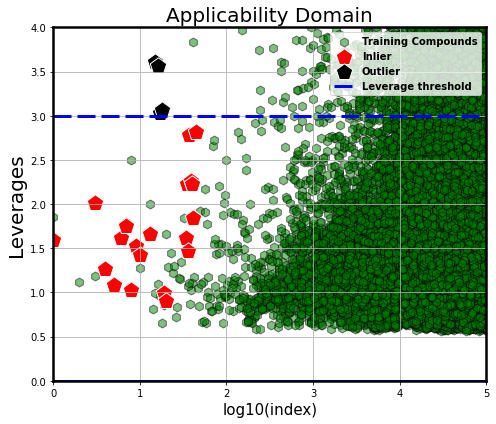

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}
#plot all training datapoints
plt.scatter(np.log10(df_total4.index), df_total4['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plot all predicting datapoints
for i in range(len(in_domain)):
    if(i == 0): #include label with if active 0 is an inlier
        plt.scatter(np.log10(in_domain[i]), in_domain_leverages[i], c='red', s=300, label="Inlier", marker="p", edgecolors='white')
    #plot all inliers in AD    
    plt.scatter(np.log10(in_domain[i]), in_domain_leverages[i], c='red', s=300, marker="p", edgecolors='white')

for i in range(len(outside_domain)):
    if (i == 0): #include label with if active 0 is an outlier
        plt.scatter(np.log10(outside_domain[i]), outside_domain_leverages[i], c='black', s=300, label="Outlier", marker="p", edgecolors='white')
    #plot all outliers in AD    
    plt.scatter(np.log10(outside_domain[i]), outside_domain_leverages[i], c='black', s=300, marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'Leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0,4)
plt.xlim(0,5)
plt.grid()
fig.savefig('final_AD.png') #save the AD as an image

In [41]:
final_in_domain = df_check['USER_ID'][in_domain]
final_outside_domain = df_check['USER_ID'][outside_domain]
final_in_domain.to_csv('final_in_domain.csv', sep = '\t', index = True, header = True)